In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

import joblib


In [2]:
data = load_breast_cancer()

X = data.data
y = data.target

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (569, 30)
Labels shape: (569,)


In [3]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(212), np.int64(1): np.int64(357)}


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [5]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', probability=True))
])

linear_pipeline.fit(X_train, y_train)

y_pred_linear = linear_pipeline.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear SVM Accuracy: 0.9736842105263158


In [6]:
rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))
])

rbf_pipeline.fit(X_train, y_train)

y_pred_rbf = rbf_pipeline.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9824561403508771


In [7]:
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(
    Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', probability=True))
    ]),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01}


In [8]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("Best Model Accuracy:", accuracy_score(y_test, y_pred))


Best Model Accuracy: 0.9824561403508771


In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



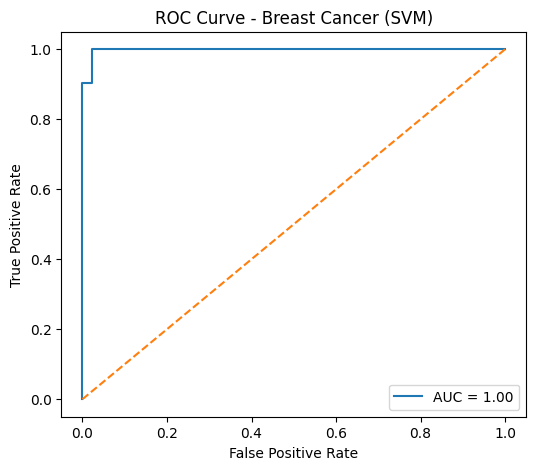

AUC Score: 0.9976851851851851


In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Breast Cancer (SVM)")
plt.legend()
plt.show()

print("AUC Score:", auc_score)


In [11]:
joblib.dump(best_model, "svm_breast_cancer_model.pkl")
print("Model saved as svm_breast_cancer_model.pkl")


Model saved as svm_breast_cancer_model.pkl
